单变量特征选择是通过单变量统计检验来选择最好的特征。它可以看作是估计器的预处理步骤。Scikit-learn将特征选择相关功能作为接口进行公开:
+ [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)删除除最高评分外的所有功能
+ [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)删除除用户指定的最高得分百分比以外的所有特征
+ 对每个特征使用通用的单变量统计检验：误报率[SelectFpr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr)，错误发现率[SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr)或多重比较谬误率[SelectFwe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe)。
+ [GenericUnivariateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect)允许使用可配置策略执行单变量特征选择。这使得我们可以用超参数搜索估计器来选择最佳的单变量选择策略。



In [29]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 基本方法
## 1.1 SelectKBest
导入特征选择库中的SelectKBest和chi2(卡方统计量)用来计算特征间与结果的相关性，并选择相关性最高的特征

In [30]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

# 获得手写数字数据
X, y = load_digits(return_X_y=True)
X.shape

# SelectKBest接收两个参数，使用的计算方法和选取的特征个数
# SelectKBest默认方法为f_classif，计算提样本的ANOVA F值
# 选择相关性最高的前20个特征
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 64)

(1797, 20)

SelectKBest具体特征输出评价如下：

In [31]:
X=[[1,2,3,4,5],
    [5,4,3,2,1],
    [3,3,3,3,3,],
    [0,1,1,1,1]]

y=[0,1,0,1]

print("特征选取的结果：",X)
selector=SelectKBest(chi2,k=3)
value = selector.fit(X,y).transform(X)
# 得分越大越好
print("特征的得分：",selector.scores_)
print("特征的p值:",selector.pvalues_)
print("保留的特征列号为：",selector.get_support(True))
print("特征选择后的值",value)


特征选取的结果： [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [0, 1, 1, 1, 1]]
特征的得分： [0.11111111 0.         0.4        1.6        3.6       ]
特征的p值: [0.73888268 1.         0.52708926 0.20590321 0.05777957]
保留的特征列号为： [2 3 4]
特征选择后的值 [[3 4 5]
 [3 2 1]
 [3 3 3]
 [1 1 1]]


## 1.2 SelectPercentile
SelectPercentile根据最高分数的百分位数选择特征。SelectPercentile方法类似于SelectKBest

In [32]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

# SelectPercentile接收两个参数，使用的计算方法和选取得分排名前percentile的特征，第一个参数默认值为f_classif
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape


(1797, 64)

(1797, 7)

SelectPercentile具体特征输出评价如下：

In [33]:
X=[[1,2,3,4,5],
    [5,4,3,2,1],
    [3,3,3,3,3,],
    [0,1,1,1,1]]

y=[0,1,0,1]

print("特征选取的结果：",X)
selector=SelectPercentile(chi2,percentile=20)
value = selector.fit(X,y).transform(X)
# 得分越大越好
print("特征的得分：",selector.scores_)
print("特征的p值:",selector.pvalues_)
print("保留的特征列号为：",selector.get_support(True))
print("特征选择后的值",value)

特征选取的结果： [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [0, 1, 1, 1, 1]]
特征的得分： [0.11111111 0.         0.4        1.6        3.6       ]
特征的p值: [0.73888268 1.         0.52708926 0.20590321 0.05777957]
保留的特征列号为： [4]
特征选择后的值 [[5]
 [1]
 [3]
 [1]]


## 1.3 SelectFpr
 SelectFpr表示基于假正例率（真实反例被预测为正例的比例 ）的大小进行特征选择

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFpr, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape

# SelectFpr有两个参数方法和显著性水平
# alpha也可以理解为保留的特征最高p值
X_new = SelectFpr(chi2, alpha=0.01).fit_transform(X, y)
X_new.shape

(569, 30)

(569, 16)

SelectFpr具体特征输出评价如下：

In [35]:
X=[[1,2,3,4,5],
    [5,4,3,2,1],
    [3,3,3,3,3,],
    [0,1,1,1,1]]

y=[0,1,0,1]

print("特征选取的结果：",X)
selector=SelectFpr(chi2, alpha=0.1)
value = selector.fit(X,y).transform(X)
# 得分越大越好
print("特征的得分：",selector.scores_)
#  过滤了P值高于alpha(设定)的值
print("特征的p值:",selector.pvalues_)
print("保留的特征列号为：",selector.get_support(True))
print("特征选择后的值",value)

特征选取的结果： [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [0, 1, 1, 1, 1]]
特征的得分： [0.11111111 0.         0.4        1.6        3.6       ]
特征的p值: [0.73888268 1.         0.52708926 0.20590321 0.05777957]
保留的特征列号为： [4]
特征选择后的值 [[5]
 [1]
 [3]
 [1]]


## 1.4 SelectFdr
Bonferroni 校正获得错误发现率。FDR为q value：衡量错误发现率的指标（False discovery rate，简称FDR，所有检验中假阳性的概率）。

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFdr, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape

# alpha是预期错误发现率的上限
X_new = SelectFdr(chi2, alpha=0.01).fit_transform(X, y)
X_new.shape

(569, 30)

(569, 16)

SelectFdr具体特征输出评价如下：

In [37]:
X=[[1,2,3,4,5],
    [5,4,3,2,1],
    [3,3,3,3,3,],
    [0,1,1,1,1]]

y=[0,1,0,1]

print("特征选取的结果：",X)
selector=SelectFdr(chi2, alpha=0.5)
value = selector.fit(X,y).transform(X)
# 得分越大越好
print("特征的得分：",selector.scores_)
print("保留的特征列号为：",selector.get_support(True))
print("特征选择后的值",value)

特征选取的结果： [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [0, 1, 1, 1, 1]]
特征的得分： [0.11111111 0.         0.4        1.6        3.6       ]
保留的特征列号为： [4]
特征选择后的值 [[5]
 [1]
 [3]
 [1]]


## 1.5 SelectFwe
SelectFwe基于族系误差进行特征选择

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFwe, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape

# alpha要保留的要素的最高未校正p值。
X_new = SelectFwe(chi2, alpha=0.01).fit_transform(X, y)
X_new.shape

(569, 30)

(569, 15)

SelectFwe具体特征输出评价如下：

In [39]:
X=[[1,2,3,4,5],
    [5,4,3,2,1],
    [3,3,3,3,3,],
    [0,1,1,1,1]]

y=[0,1,0,1]

print("特征选取的结果：",X)
selector=SelectFwe(chi2, alpha=0.5)
value = selector.fit(X,y).transform(X)
# 得分越大越好
print("特征的得分：",selector.scores_)
print("保留的特征列号为：",selector.get_support(True))
print("特征选择后的值",value)

特征选取的结果： [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [0, 1, 1, 1, 1]]
特征的得分： [0.11111111 0.         0.4        1.6        3.6       ]
保留的特征列号为： [4]
特征选择后的值 [[5]
 [1]
 [3]
 [1]]


## 1.6 GenericUnivariateSelect
GenericUnivariateSelect可以设置不同的策略来进行单变量特征选择

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape

# 参数分别为方法，选择模式，选择多少种特征
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)
X_new.shape

(569, 30)

(569, 20)

# 2 单变量特征选择特征方法应用
## 2.1 单变量特征选择特征方法选择说明
单变量特征选择方法就是将特征输入到评分函数，返回一个单变量的f_score(F检验的值)或p-values(P值，假设检验中的一个标准，P-value用来和显著性水平作比较)，注意SelectKBest 和 SelectPercentile只有得分，没有p-value。对于方法的选择推荐如下：
+ 回归的数据：f_regression，mutual_info_regression
+ 分类的数据：chi2，f_classif，mutual_info_classif

如果你使用稀疏数据(比如，使用稀疏矩阵表示的数据), 卡方检验(chi2)、互信息回归(mutual_info_regression)、互信息分类(mutual_info_classif)在处理数据时可保持其稀疏性，因此被推荐选择)。但是要注意的是当心不要在分类问题上使用回归评分函数，将获得无用的结果。

## 2.2 单变量特征选择特征实例
**单变量特征选择**

本例中噪声特征会添加到鸢尾花数据中，将鸢尾花的特征数4增值到24，并且会应用单变量特征选择。然后使用SVM进行分类，查看没有进行特征选择是SVM分类器的效果。

对于每个特征，我们绘制单变量特征选择的p值以及SVM的相应权重。我们可以看到单变量特征选择会选择信息特征，并且这些特征具有更大的SVM权重。在全部特征中，只有前四个是有意义的。我们可以看到他们在单变量特征选择方面得分最高。SVM会为这些功能之一分配较大的权重，但还会选择许多非重要性功能。在SVM之前应用单变量特征选择会增加归因于重要特征的SVM权重，从而改善分类效率。

可以看到未经过特征提取的分类器得分: 0.789，经过特征提取的分类器得分: 0.868

未经过特征提取的分类器得分: 0.789
经过特征提取的分类器得分: 0.868


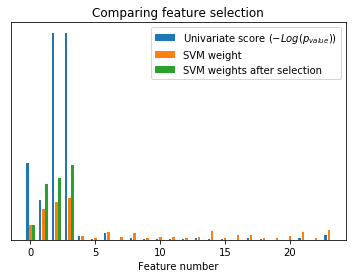

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
# 鸢尾花数据集
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
# 添加噪声
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
# 添加噪声特征，原来只有四个特征
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
# 分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

# 新建一个名为figure1窗口
plt.figure(1)
# 清除当前 figure 的所有axes，但是不关闭这个 window，所以能继续复用于其他的 plot
plt.clf()

# 特征标号
X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
#基于F检验的特征评分单变量特征选择
# 我们使用默认的选择函数来选择这四个最显著的特征
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
# 每个特征p值取对数
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
# 每个特征的特征的得分图
# 蓝色的柱子
plt.bar(X_indices - .25, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

# #############################################################################
# Compare to the weights of an SVM
# 与支持向量机的权重进行比较
clf = make_pipeline(MinMaxScaler(), LinearSVC())

clf.fit(X_train, y_train)
# 无特征选择得分
print('未经过特征提取的分类器得分: {:.3f}'.format(clf.score(X_test, y_test)))
# 提取权重
svm_weights = np.abs(clf.named_steps['linearsvc'].coef_).sum(axis=0)

svm_weights /= svm_weights.sum()
# 橙色的柱子
plt.bar(X_indices, svm_weights, width=.2, label='SVM weight');

# #############################################################################
# 特征提取后支持向量机分类
clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('经过特征提取的分类器得分: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected.named_steps['linearsvc'].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] + .25, svm_weights_selected,
        width=.2, label='SVM weights after selection')


# 特征选择性能比较
plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show();

**F检验和相互信息的比较**

本例可视化y与三个变量之间的独立关系，并且正则化单变量F检验和互信息（有用的信息度量）二者的计算值。  
因F检验只能捕捉线性依赖关系，因此它把x1评为最关键的特征。而互信息能捕捉变量之间所有类型的依赖关系，因此它将x2评为最关键的特征，在这个例子中，它比较符合我们的直观感觉。 两种方法都能正确地把x_3评为不相关特征。

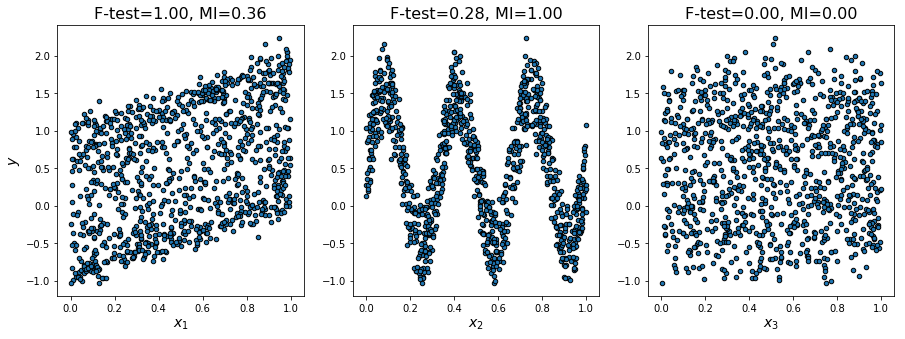

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# # 设定随机种子
np.random.seed(0)
# # 随机生成包含1000个样本，3个特征值的特征值，值越大越重要
X = np.random.rand(1000, 3)
# 计算y值，并指定y值与x各个特征关系
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

# 单变量线性回归测试
f_test, _ = f_regression(X, y)
# 将F值结果正则化
# 测试线性模型中每一个回归因子的的影响
f_test /= np.max(f_test)

# 互信息计算（有用的信息度量），值越大越重要
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show();

# 3 参考

> [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

> [https://www.cnblogs.com/tszr/p/10802025.html](https://www.cnblogs.com/tszr/p/10802025.html)

> [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)

> [https://www.cnblogs.com/tszr/p/10802026.html](https://www.cnblogs.com/tszr/p/10802026.html)

> [http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.feature_selection.SelectFpr.html](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.feature_selection.SelectFpr.html)

> [https://www.zhihu.com/question/23149768](https://www.zhihu.com/question/23149768)

> [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr)

> [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe)

> [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect)

> [https://www.cnblogs.com/stevenlk/p/6543628.html](https://www.cnblogs.com/stevenlk/p/6543628.html)

> [https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py)

> [https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

> [https://blog.csdn.net/int_line/article/details/100231664](https://blog.csdn.net/int_line/article/details/100231664)